In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.core.display import HTML

In [2]:
# %pip install lib/extcolors
import extcolors

## Data Set

from Kaggle [Best Artworks of All Time](https://www.kaggle.com/ikarus777/best-artworks-of-all-time)

In [3]:
df_artists = pd.read_csv('data/best-artworks-of-all-time/artists.csv')
df_artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


## Color Extraction

Explore some ways to perform [color quantization](https://en.wikipedia.org/wiki/Color_quantization) and extract the main colors from the images.

In [4]:
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg'

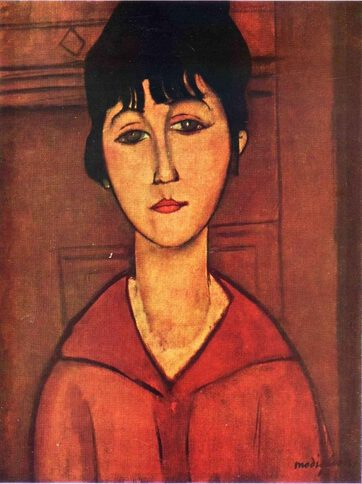

In [5]:
from IPython.display import Image
Image(filename=image_path) 

A utility function to print color blocks.

Just personal choices, I do this with HTML stuff

In [6]:
def color2css(color):
    if type(color) == str:
        return color # '#'+color.lstrip('#')
    
    # Assuming tuple (iterator)
    tp = 'rgb'
    if len(color) == 4:
        tp = 'rgba'
    return f'{tp}{tuple(c for c in color)}' 

def show_color_blocks(colors, labels=None, size='100px'):
    BLOCK_STYLE = f"""
        float: left; 
        width: {size}; height:{size}; 
        font-size: 8px;
        text-align: center;
        text-shadow: white 0px 0px 5px;
        border: 1px solid rgba(60,60,60,0.52);

        margin: 1px;
    """
    
    if labels is None:
        labels = [str(c) for c in colors]
    
    return HTML(''.join([
        f'<span style="background: {color2css(c)}; {BLOCK_STYLE}">{label}</span>'
        for c, label in zip(colors, labels)
    ]))

# example
show_color_blocks([
    (255, 127, 0, 0.5), 
    (255,255,255), 
    (0x6c,0x6c,0x6c),
    '#6c6c6c'
], size='100px')

### Color extraction with `extcolors`

In [7]:
data, pixel_count = extcolors.extract(
    "data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_72.jpg")
(data, pixel_count)

([((139, 74, 54), 131171),
  ((19, 19, 19), 42877),
  ((240, 212, 237), 340),
  ((248, 179, 84), 337),
  ((81, 14, 0), 308),
  ((96, 16, 19), 174),
  ((41, 26, 5), 1)],
 175208)

In [8]:
data, pixel_count = extcolors.extract(image_path, tolerance=32)

In [9]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

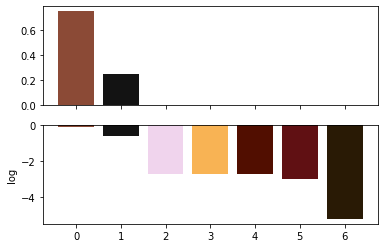

In [10]:
%matplotlib inline
colors = [tuple(i/255 for i in color) for color, _ in data]
histo = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, histo, color=colors)
ax2.bar(x, np.log10(histo), color=colors)
ax2.set_ylabel('log')
plt.show()

In [11]:
# Try similar color with lower res
data, pixel_count = extcolors.extract(image_path, tolerance=12)

colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

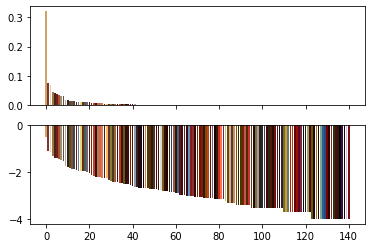

In [43]:
%matplotlib inline
colors = np.array([tuple(i/255 for i in color) for color, _ in data])
amounts = np.array([(count / pixel_count) for _, count in data])

x = range(len(labels))
_, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(x, amounts, color=colors)
ax2.bar(x, np.log10(amounts), color=colors)
plt.show()

### In RGB color space

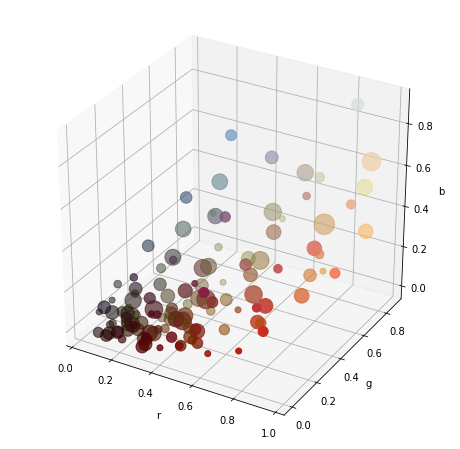

In [44]:
%matplotlib inline 
#notebook

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d', facecolor='white')

sz = np.log10(amounts)
sz -= sz.min()
sz *= 120

ax.scatter(colors[:,0], colors[:,1], colors[:,2], 
           c=colors, marker='o', 
           s=sz
          )

ax.set_xlabel('r')
ax.set_ylabel('g')
ax.set_zlabel('b')
plt.show()

### More explorartion on color extractions

In [14]:
import time
start = time.time()
image_path = 'data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=40)
print(len(data))
time.time() - start

6


45.790390968322754

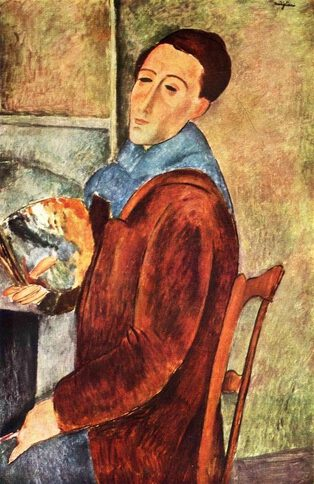

In [15]:
from IPython.display import Image
Image(filename=image_path)

In [16]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [17]:
%mkdir data/tmp

mkdir: data/tmp: File exists


In [18]:
# Resize to 100x100
from PIL import Image
im = Image.open(image_path)
im = im.resize((100, 100))
# im.show()
im.save('data/tmp/'+image_path.split('/')[-1])

In [19]:
# def count_dom_colors():
import time
start = time.time()
image_path = 'data/out/Amedeo_Modigliani_73.jpg'
data, pixel_count = extcolors.extract(image_path, tolerance=10)
print(len(data))
time.time() - start

141


0.5601098537445068

In [20]:
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]

show_color_blocks(colors, labels, size="50px")

In [191]:
from PIL import Image
def resize_extract(image_path, tolerance=32, size=100):
    start = time.time()
    
    im = Image.open(image_path)
    im = im.resize((size, size))
    image_path_out = 'data/tmp/'+image_path.split('/')[-1]
    im.save(image_path_out)
    print(f'resized image saved to "{image_path_out}"')

    data, pixel_count = extcolors.extract(image_path_out, tolerance=tolerance)
    
    print(f'done in {time.time() - start}')
    return data, pixel_count

#example 
data, pixel_count = resize_extract('data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg')
colors = [color for color, _ in data]
labels = [format(count / pixel_count, '.1g') for _, count in data]
show_color_blocks(colors, labels, size="50px")

resized image saved to "data/tmp/Amedeo_Modigliani_73.jpg"
done in 0.2572171688079834


In [22]:
import os

rootDir = 'data/best-artworks-of-all-time/images/images'
for dirName, subdirList, fileList in os.walk(rootDir, topdown=False):
    #print('directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        pass

In [23]:
c1 = np.array(colors[0])
c2 = np.array(colors[1])

import colorsys
colorsys.rgb_to_hsv(*c1)

(0.09365079365079365, 0.5048076923076923, 208)

In [24]:
colorsys.rgb_to_hsv(*c2)

(0.01807228915662651, 0.6535433070866141, 127)

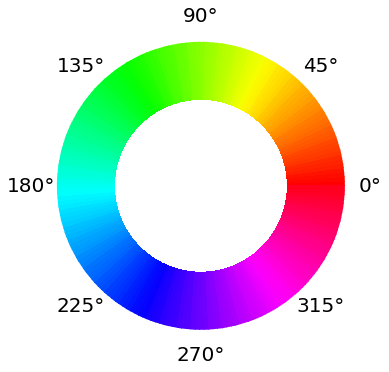

In [25]:
%matplotlib inline
fg = plt.figure(figsize=(5,5))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

cmap = plt.cm.hsv
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(0, 2*np.pi)  

# Plot a color mesh on the polar plot
# with the color set by the angle

n = 200  #the number of secants for the mesh
t = np.linspace(0,2*np.pi,n)   #theta values
r = np.linspace(.6,1,2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
c = tg                         #define color values as theta value

im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                    #turn of radial tick labels (yticks)
ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)

In [26]:
c_red = (255, 0, 0)
h,_,_=colorsys.rgb_to_hsv(*c_red)
angle_red = h*2*np.pi
angle_red

0.0

In [27]:
c_red_ = (0, 255, 255)
h,_,_=colorsys.rgb_to_hsv(*c_red_)
angle_red_ = h*2*np.pi
angle_red_

3.141592653589793

In [28]:
show_color_blocks([(0, 255, 255)])

In [67]:
def get_color_angle(color, scale=2*np.pi ):
    h,_,_=colorsys.rgb_to_hsv(*color)
    return h*scale

# example
print(get_color_angle((0, 255, 255)))
print(get_color_angle((0, 255, 255), scale=1))
print(get_color_angle((0, 255, 0), scale=1))
print(get_color_angle((255, 0, 0), scale=1))

3.141592653589793
0.5
0.3333333333333333
0.0


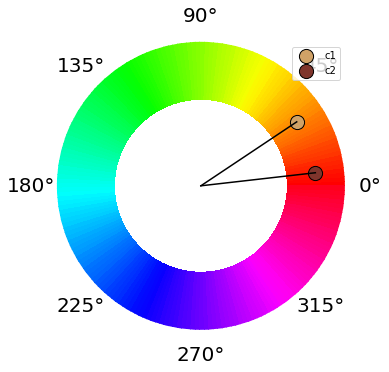

In [30]:
%matplotlib inline
fg = plt.figure(figsize=(5,5))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

cmap = plt.cm.hsv
# Define colormap normalization for 0 to 2*pi
norm = mpl.colors.Normalize(0, 2*np.pi)  

# Plot a color mesh on the polar plot
# with the color set by the angle

n = 200  #the number of secants for the mesh
t = np.linspace(0, 2*np.pi, n)   #theta values
r = np.linspace(.6, 1, 2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)        #create a r,theta meshgrid
c = tg                           #define color values as theta value
im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                   #turn of radial tick labels (yticks)

h_c1 = get_color_angle(c1)
h_c2 = get_color_angle(c2)
ax.scatter(h_c1, 0.8, c=[c1/255], s=200, edgecolor='k')
ax.scatter(h_c2, 0.8, c=[c2/255], s=200, edgecolor='k')

ax.legend(['c1', 'c2'])

# ax.text(h_c1, 0.8, 'c1')
# ax.text(h_c2, 0.8, 'c2')
ax.plot([0, h_c1], [0, 0.8], color='k')
ax.plot([0, h_c2], [0, 0.8], color='k')

ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)

In [73]:
# Complementary color metrics (inversed)
def metric_similar_hue(c1, c2):
    """
    [0, 1]
    
    0: complementary color hue
    1: same (similar) color hue
    """
    h1 = get_color_angle(c1, scale=1)  # h is from 0 to 1 (since scale==1)
    h2 = get_color_angle(c2, scale=1)
    
    h1_ = (0.5 + h1) % 1  # circular
    m = np.abs(h1_ - h2) * 2 % 1 # abs to kill linear-ness
    return m

metric_similar_hue((255,0,0), (0,255,255))

0.0

In [74]:
metric_similar_hue((255,0,0), (0,0,255))

0.33333333333333326

In [75]:
metric_similar_hue((255,0,0), (255,0,0))

0.0

In [76]:
metric_similar_hue((255,0,0), (255,255,0))

0.6666666666666667

similar_hue metrics: 0.6666666666666667


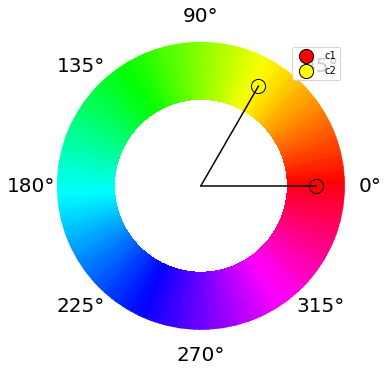

In [77]:
# make sure it make sense
%matplotlib inline

def show_colors_on_ring(c1, c2):
    c1 = np.array(c1)
    c2 = np.array(c2)
    
    fg = plt.figure(figsize=(5,5))
    ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

    cmap = plt.cm.hsv
    # Define colormap normalization for 0 to 2*pi
    norm = mpl.colors.Normalize(0, 2*np.pi)  

    # Plot a color mesh on the polar plot
    # with the color set by the angle

    n = 200  #the number of secants for the mesh
    t = np.linspace(0, 2*np.pi, n)   #theta values
    r = np.linspace(.6, 1, 2)        #radius values change 0.6 to 0 for full circle
    rg, tg = np.meshgrid(r,t)        #create a r,theta meshgrid
    c = tg                           #define color values as theta value
    im = ax.pcolormesh(t, r, c.T, cmap=cmap, norm=norm)  #plot the colormesh on axis with colormap
    ax.set_yticklabels([])                   #turn of radial tick labels (yticks)

    h_c1 = get_color_angle(c1)
    h_c2 = get_color_angle(c2)
    ax.scatter(h_c1, 0.8, c=[c1/255], s=200, edgecolor='k')
    ax.scatter(h_c2, 0.8, c=[c2/255], s=200, edgecolor='k')

    ax.legend(['c1', 'c2'])

    # ax.text(h_c1, 0.8, 'c1')
    # ax.text(h_c2, 0.8, 'c2')
    ax.plot([0, h_c1], [0, 0.8], color='k')
    ax.plot([0, h_c2], [0, 0.8], color='k')

    ax.tick_params(pad=15, labelsize=20)      #cosmetic changes to tick labels
    ax.spines['polar'].set_visible(False)
    
c1 = (255, 0, 0)
c2 = (255, 255, 0)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.0


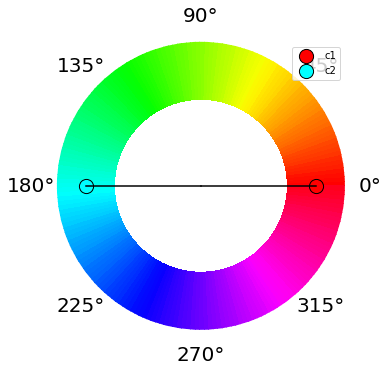

In [78]:
c1 = (255, 0, 0)
c2 = (0, 255, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.33333333333333326


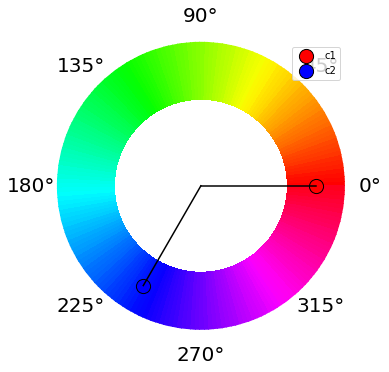

In [79]:
c1 = (255, 0, 0)
c2 = (0, 0, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

similar_hue metrics: 0.4980392156862745


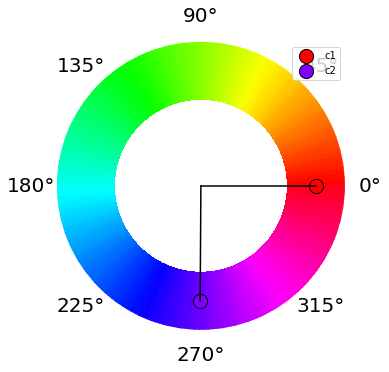

In [80]:
%matplotlib inline
c1 = (255, 0, 0)
c2 = (126, 0, 255)
print('similar_hue metrics:', metric_similar_hue(c1, c2))
show_colors_on_ring(c1, c2)

### Limitations

However, using only hue as substitative/complementary metric will fail to 
capture the lightness of the colors.

e.g. for a painting that uses _dark-red_ color and _light-red_ color as theme colors, 
we might still get two red hues -> similar. But actually they can be quite distinct. 

If we have a red-biased painting, e.g. a painting that consists and only consists of
red colors - just various in saturation, subjectively, I would say the painting can
still be contrast by different degrees of red.

A way to approach this issue could be find a way to cooperate **h**ue **s**aturation and **v**alue together.

In [91]:
colors = [color for color, _ in data]
occr = [(count / pixel_count) for _, count in data]

list(zip(colors, occr))

[((208, 162, 103), 0.3209),
 ((127, 53, 44), 0.0766),
 ((240, 205, 167), 0.0676),
 ((154, 119, 65), 0.0462),
 ((75, 31, 28), 0.0402),
 ((110, 33, 23), 0.0384),
 ((172, 76, 51), 0.0356),
 ((152, 148, 110), 0.0312),
 ((109, 75, 66), 0.0303),
 ((180, 168, 156), 0.0182),
 ((47, 33, 30), 0.017),
 ((106, 71, 29), 0.0151),
 ((108, 88, 61), 0.0135),
 ((75, 69, 73), 0.013),
 ((107, 25, 29), 0.0117),
 ((95, 132, 140), 0.0115),
 ((227, 216, 127), 0.0112),
 ((104, 47, 20), 0.0109),
 ((71, 96, 93), 0.0107),
 ((107, 104, 115), 0.0097),
 ((80, 15, 9), 0.0093),
 ((127, 35, 14), 0.0073),
 ((194, 64, 50), 0.0065),
 ((57, 16, 12), 0.0063),
 ((167, 125, 101), 0.0062),
 ((216, 102, 48), 0.0061),
 ((223, 115, 102), 0.0058),
 ((77, 27, 0), 0.0055),
 ((248, 182, 95), 0.0054),
 ((106, 45, 53), 0.0046),
 ((133, 129, 56), 0.0042),
 ((75, 58, 30), 0.0039),
 ((156, 96, 60), 0.0039),
 ((50, 18, 23), 0.0036),
 ((186, 61, 29), 0.0034),
 ((73, 14, 0), 0.0033),
 ((99, 88, 34), 0.0031),
 ((30, 18, 18), 0.0031),
 ((80, 6

In [51]:
import itertools
list(itertools.combinations(range(3), 2)) 

[(0, 1), (0, 2), (1, 2)]

In [87]:
# metric_similar_hue(c1, c2)


for c1, c2 in itertools.combinations(colors[:3], 2):
    print(c1, c2, metric_similar_hue(c1, c2))
    print('index', colors.index(c1), colors.index(c2) )
    print('occr', labels[colors.index(c1)], labels[colors.index(c2)] )


(208, 162, 103) (127, 53, 44) 0.15115700898833428
index 0 1
occr 0.3 0.08
(208, 162, 103) (240, 205, 167) 0.013785605566427384
index 0 2
occr 0.3 0.07
(127, 53, 44) (240, 205, 167) 0.8626285965780932
index 1 2
occr 0.08 0.07


m 0.15115700898833428


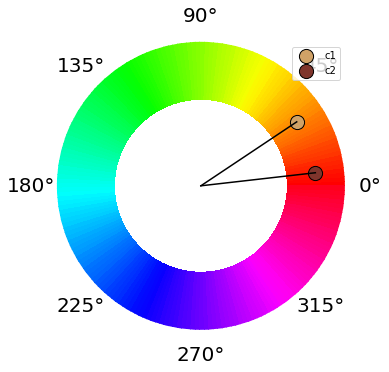

In [83]:
c1, c2 = (208, 162, 103), (127, 53, 44)

h1 = get_color_angle(c1, scale=1)  # h is from 0 to 1 (since scale==1)
h2 = get_color_angle(c2, scale=1)
# print(f'h1={h1}, h2={h2}')

h1_ = (0.5 + h1) % 1  # circular
# print(f'h1_={h1_}')
m = np.abs(h1_ - h2) * 2 % 1  # abs to kill linear-ness
print('m', m)
# print((h1_ - h2) * 2)
# print((h1 - h2) * 2)

show_colors_on_ring(c1, c2)

In [195]:
# metric_similar_hue(c1, c2)
def calc_similarity_expetation(data, thres=0.01):
    colors = [color for color, _ in data]               #[:5]
    occr = [(count / pixel_count) for _, count in data] #[:5]
    
    #     colors, occr = [],  []
    #     for c, count in data:
    #         p = count / pixel_count
    #         if p > thres:
    #             colors.append(c)
    #             occr.append(p)
    
    acc = 0

    l = len(colors)
    n=l*(l-1)/2
    pairs = itertools.combinations(colors[:], 2)

    for c1, c2 in pairs:
        #     pairs.append( c1, , c2, metric_similar_hue(c1, c2) )
        p1 = occr[colors.index(c1)]
        p2 = occr[colors.index(c2)]
        m = metric_similar_hue(c1, c2)
        #     print(p1,  p2, m, p1*p2*m)
        acc += (m * p1 * p2)

    return acc  # / n

#example 
data, pixel_count = resize_extract('data/best-artworks-of-all-time/resized/resized/Amedeo_Modigliani_73.jpg')
calc_similarity_expetation(data, 0.01)

resized image saved to "data/tmp/Amedeo_Modigliani_73.jpg"
done in 0.25586891174316406


0.03988829191809647

In [180]:
import os

image_score_map = {}

c = 0

start = time.time()

rootDir = 'data/best-artworks-of-all-time/images/images'
for dirName, subdirList, fileList in os.walk(rootDir, topdown=False):
    #print('directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        fn = os.path.join(dirName, fname)
        c += 1
        if c>100: break
        #print(fn)
        data, pixel_count = resize_extract(fn)
        try:
            score = calc_similarity_expetation(data, 0.0)
        except:
            pass
        else:
            image_score_map[fn] = score
print('time', time.time()-start)
image_score_map         

resized image saved to "data/tmp/Piet_Mondrian_38.jpg"
done in 0.3120760917663574
resized image saved to "data/tmp/Piet_Mondrian_10.jpg"
done in 0.11151266098022461
resized image saved to "data/tmp/Piet_Mondrian_11.jpg"
done in 0.23942804336547852
resized image saved to "data/tmp/Piet_Mondrian_39.jpg"
done in 0.05896496772766113
resized image saved to "data/tmp/Piet_Mondrian_13.jpg"
done in 0.08969664573669434
resized image saved to "data/tmp/Piet_Mondrian_12.jpg"
done in 0.05141711235046387
resized image saved to "data/tmp/Piet_Mondrian_16.jpg"
done in 0.42073512077331543
resized image saved to "data/tmp/Piet_Mondrian_17.jpg"
done in 0.18371796607971191
resized image saved to "data/tmp/Piet_Mondrian_15.jpg"
done in 0.16920709609985352
resized image saved to "data/tmp/Piet_Mondrian_29.jpg"
done in 0.32125377655029297
resized image saved to "data/tmp/Piet_Mondrian_28.jpg"
done in 0.028717994689941406
resized image saved to "data/tmp/Piet_Mondrian_14.jpg"
done in 0.1907057762145996
resiz

{'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_38.jpg': 0.5114086162763173,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_10.jpg': 0.6435002736726876,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_11.jpg': 0.5670060258934431,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_39.jpg': 0.44837584156469606,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_13.jpg': 0.5986010778580437,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_12.jpg': 0.411793372319688,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_16.jpg': 0.4224806860150016,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_17.jpg': 0.4568589899251708,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_15.jpg': 0.4338979033694769,
 'data/best-artworks-of-all-time/images/images/Piet_Mondrian/Pie

In [120]:
import operator
sortedarr = sorted(image_score_map.items(), key=operator.itemgetter(1))
sortedarr

[]

In [119]:
import os

image_score_map = {}

c = 0

rootDir = 'data/best-artworks-of-all-time/images/images'
for dirName, subdirList, fileList in os.walk(rootDir, topdown=False):
    #print('directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        c+=1
        
c         


8774

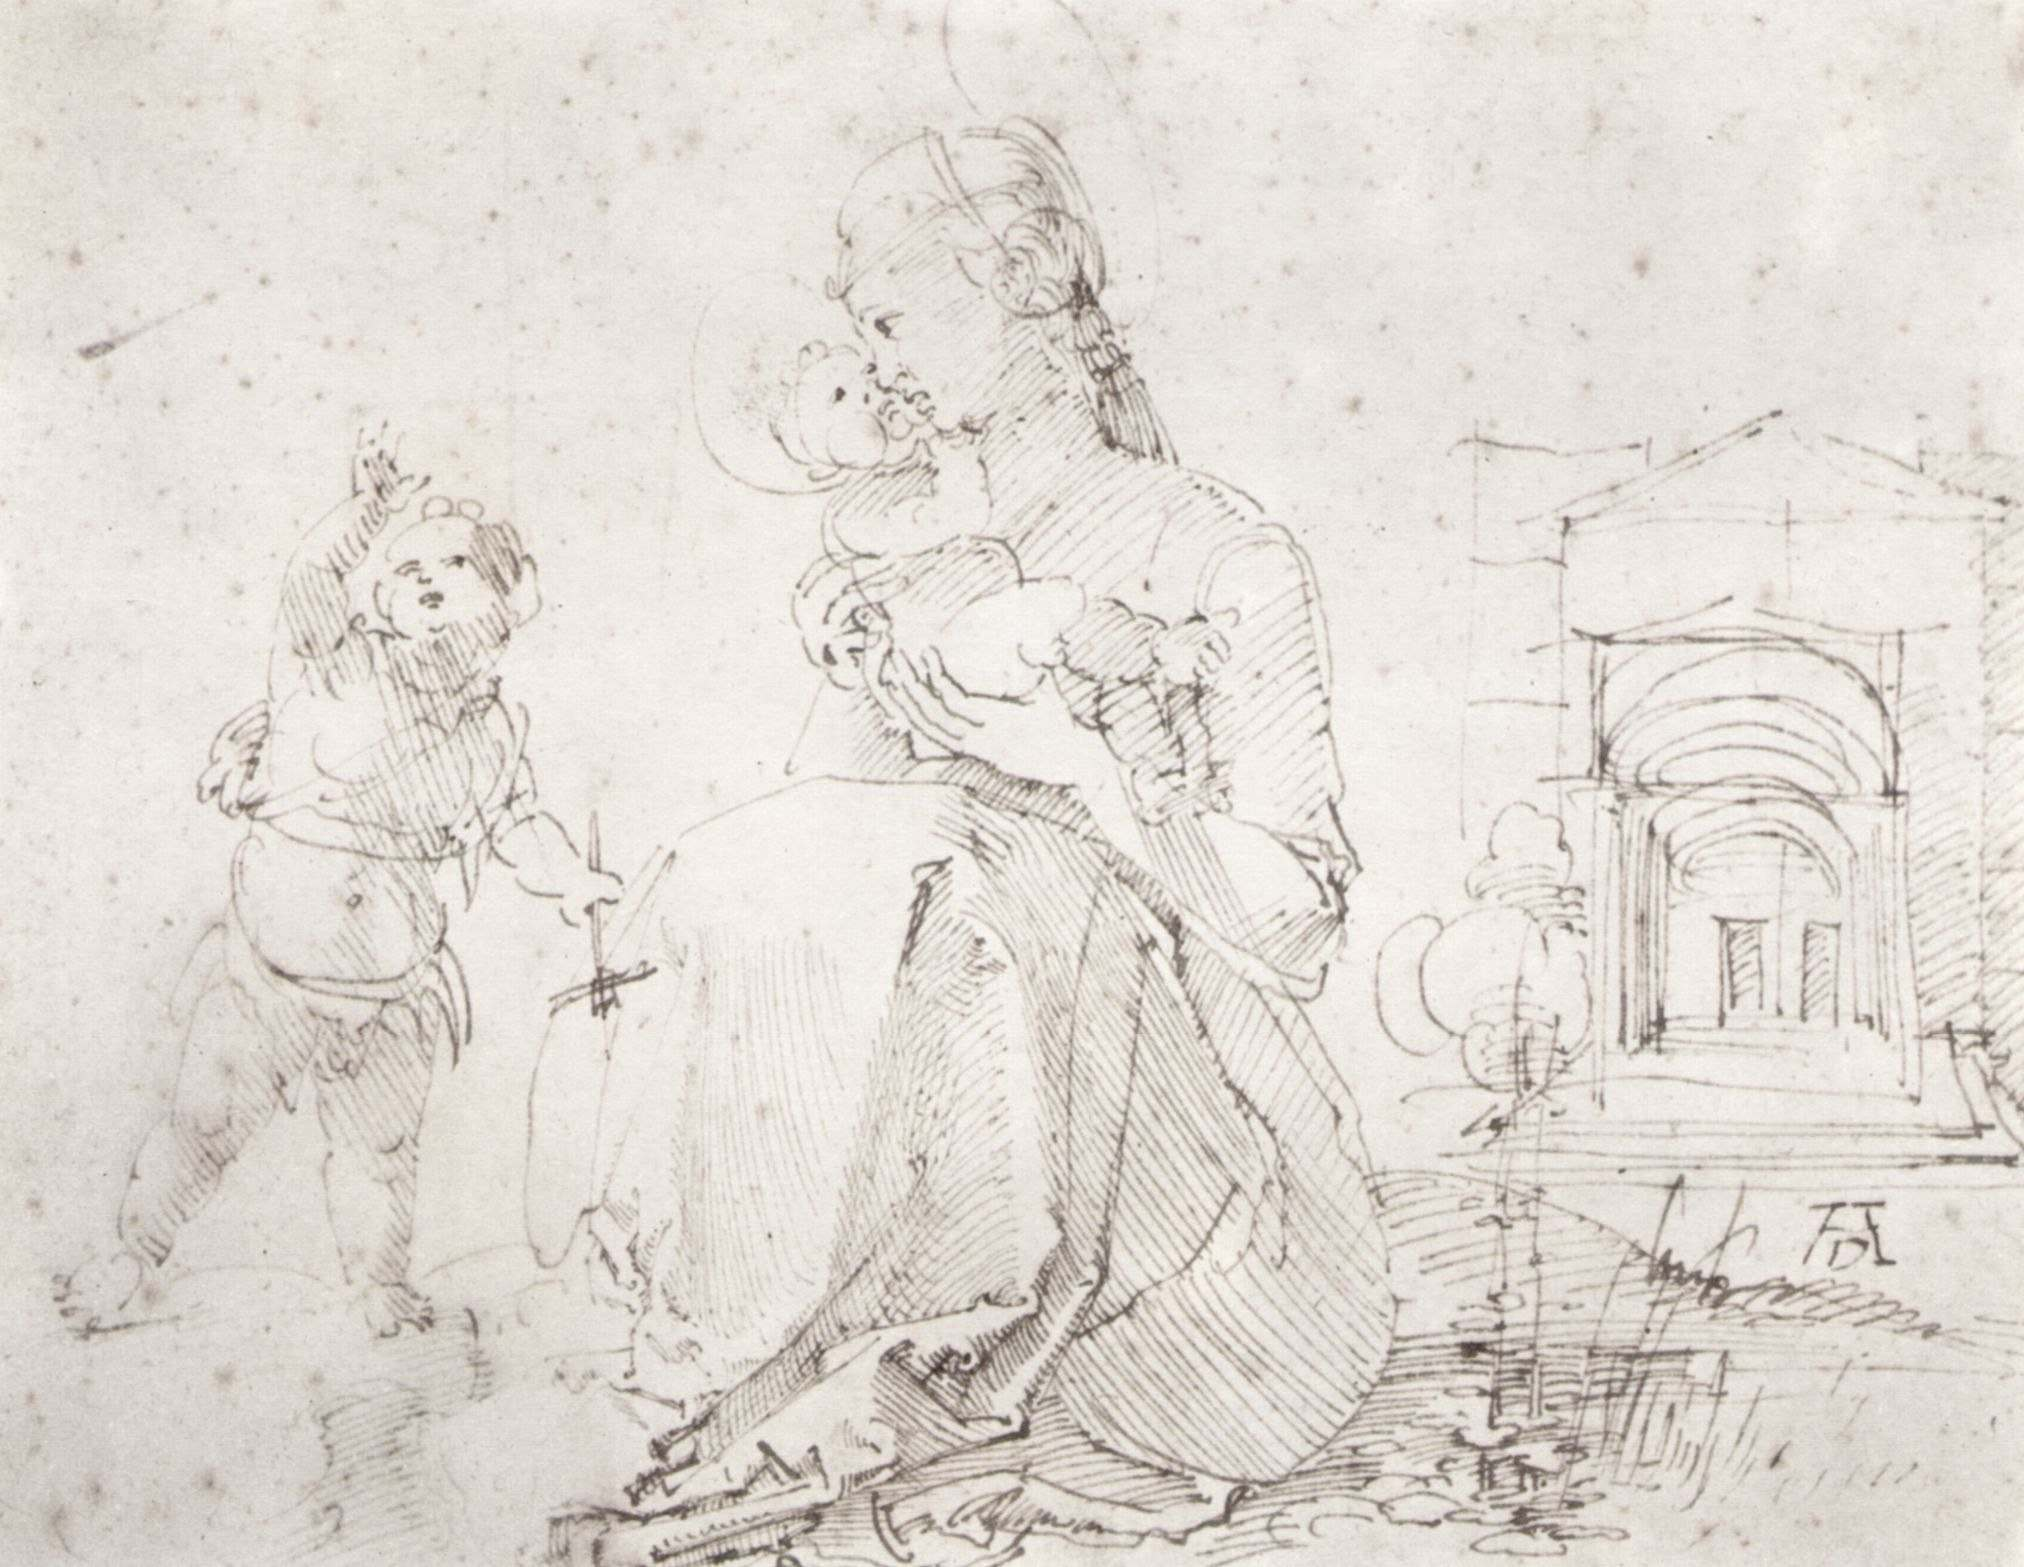

In [123]:
from IPython.display import Image
Image(filename='data/best-artworks-of-all-time/images/images/Albrecht_Du╠êrer/Albrecht_Du╠êrer_290.jpg')

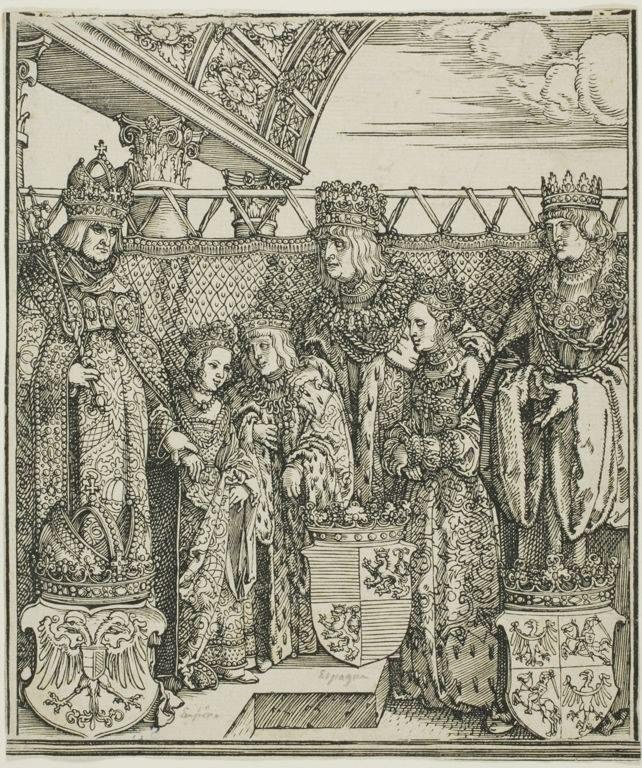

In [124]:
from IPython.display import Image
Image(filename='data/best-artworks-of-all-time/images/images/Albrecht_Du╠êrer/Albrecht_Du╠êrer_125.jpg')

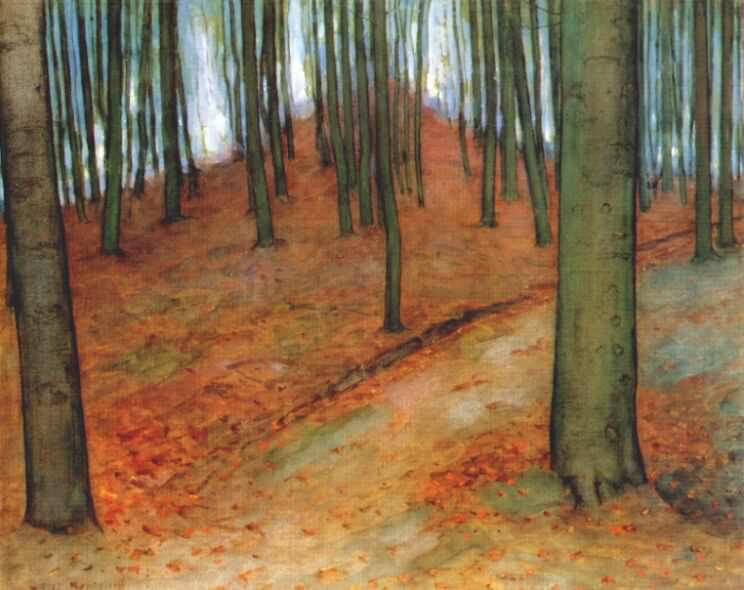

In [131]:
Image(filename='data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_76.jpg')
Image(filename='data/best-artworks-of-all-time/images/images/Piet_Mondrian/Piet_Mondrian_76.jpg')

In [138]:
from PIL import Image
size = 100
for (image_path, score) in list(image_score_map.items())[:20]:
    im = Image.open(image_path)
    im = im.resize((size, size))
    image_path_out = 'data/out_score/'+str(format(score, '.2f'))+'.jpg'
    im.save(image_path_out)
    print(image_path_out)

data/out_score/0.51.jpg
data/out_score/0.64.jpg
data/out_score/0.57.jpg
data/out_score/0.45.jpg
data/out_score/0.60.jpg
data/out_score/0.41.jpg
data/out_score/0.42.jpg
data/out_score/0.46.jpg
data/out_score/0.43.jpg
data/out_score/0.58.jpg
data/out_score/0.35.jpg
data/out_score/0.87.jpg
data/out_score/0.46.jpg
data/out_score/0.60.jpg
data/out_score/0.45.jpg
data/out_score/0.71.jpg
data/out_score/0.43.jpg
data/out_score/0.65.jpg
data/out_score/0.48.jpg
data/out_score/0.42.jpg


In [132]:
%mkdir data/out_score

In [156]:
image_path = list(image_score_map.items())[1][0]

# PIL accesses images in Cartesian co-ordinates, so it is Image[columns, rows]
img = Image.open(image_path)
pixels = img.load() # create the pixel map

for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        h,s,v = colorsys.rgb_to_hsv(*pixels[i,j]) # set the colour accordingly
        s,v=1,1
        pixels[i,j] = tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))
        #print(pixels[i,j])

img.show()


In [153]:
colorsys.rgb_to_hsv(255,0,0)

(0.0, 1.0, 255)

In [155]:
h,s,v

(0.9733333333333334, 0.12562814070351758, 199)

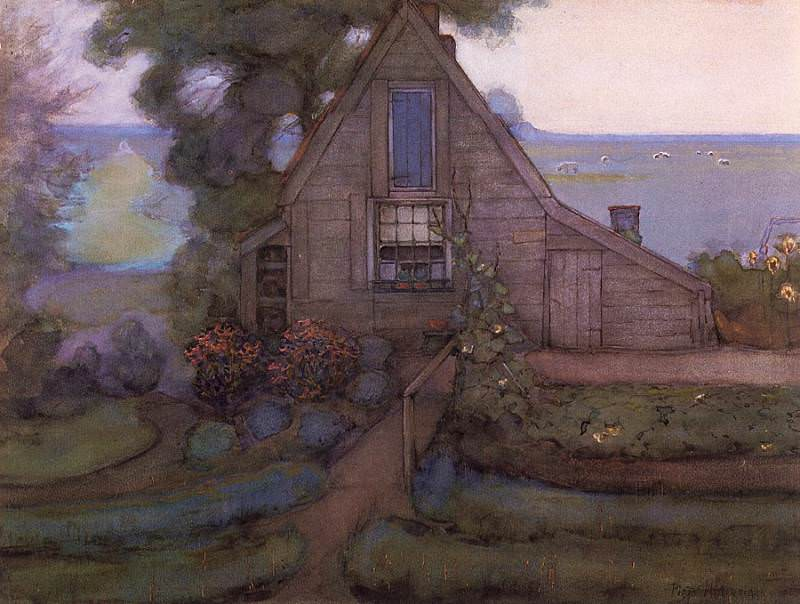

In [157]:
from IPython.display import Image
Image(filename=image_path)

In [164]:
# def hue_only(image_path, out):
# PIL accesses images in Cartesian co-ordinates, so it is Image[columns, rows]
img = Image.open(image_path)
pixels = img.load() # create the pixel map

for i in range(img.size[0]):    # for every col:
    for j in range(img.size[1]):    # For every row
        h,s,v = colorsys.rgb_to_hsv(*pixels[i,j]) # set the colour accordingly
        s,v=1,1
        pixels[i,j] = tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))
        #print(pixels[i,j])
# img.show()
img.save('out.png') 

In [196]:
import os

image_score_map = {}

c = 0

start = time.time()

rootDir = 'data/best-artworks-of-all-time/images/images'
for dirName, subdirList, fileList in os.walk(rootDir, topdown=False):
    #print('directory: %s' % dirName)
    for fname in fileList:
        #print('\t%s' % fname)
        fn = os.path.join(dirName, fname)
        c += 1
        if c>100: break
        #print(fn)
        data, pixel_count = resize_extract(fn, )
        if len(data[0]) > 7:
            continue
        try:
            score = calc_similarity_expetation(data, 0.0)
        except:
            pass
        else:
            image_score_map[fn] = score
            
print('time', time.time()-start)
# image_score_map         

resized image saved to "data/tmp/Piet_Mondrian_38.jpg"
done in 1.2727508544921875
resized image saved to "data/tmp/Piet_Mondrian_10.jpg"
done in 0.1220238208770752
resized image saved to "data/tmp/Piet_Mondrian_11.jpg"
done in 0.26456785202026367
resized image saved to "data/tmp/Piet_Mondrian_39.jpg"
done in 0.06378984451293945
resized image saved to "data/tmp/Piet_Mondrian_13.jpg"
done in 0.09051966667175293
resized image saved to "data/tmp/Piet_Mondrian_12.jpg"
done in 0.05767011642456055
resized image saved to "data/tmp/Piet_Mondrian_16.jpg"
done in 0.4610300064086914
resized image saved to "data/tmp/Piet_Mondrian_17.jpg"
done in 0.18648028373718262
resized image saved to "data/tmp/Piet_Mondrian_15.jpg"
done in 0.15570783615112305
resized image saved to "data/tmp/Piet_Mondrian_29.jpg"
done in 0.3141520023345947
resized image saved to "data/tmp/Piet_Mondrian_28.jpg"
done in 0.029597997665405273
resized image saved to "data/tmp/Piet_Mondrian_14.jpg"
done in 0.1974940299987793
resized 

time 18.066615104675293


In [197]:
from PIL import Image
size = 100
for (image_path, score) in list(image_score_map.items())[:]:
    img = Image.open(image_path)
    img = img.resize((size, size))

    pixels = img.load() # create the pixel map
    for i in range(img.size[0]):    # for every col:
        for j in range(img.size[1]):    # For every row
            h,s,v = colorsys.rgb_to_hsv(*pixels[i,j]) # set the colour accordingly
            s,v=1,1
            pixels[i,j] = tuple(round(i * 255) for i in colorsys.hsv_to_rgb(h,s,v))
            #print(pixels[i,j])
    
    image_path_out = 'data/out_score_hue/'+str(format(score, '.2f'))+'.jpg'
    img.save(image_path_out)
    print(image_path_out)

data/out_score_hue/0.09.jpg
data/out_score_hue/0.01.jpg
data/out_score_hue/0.05.jpg
data/out_score_hue/0.00.jpg
data/out_score_hue/0.08.jpg
data/out_score_hue/0.00.jpg
data/out_score_hue/0.19.jpg
data/out_score_hue/0.03.jpg
data/out_score_hue/0.14.jpg
data/out_score_hue/0.23.jpg
data/out_score_hue/0.01.jpg
data/out_score_hue/0.14.jpg
data/out_score_hue/0.20.jpg
data/out_score_hue/0.01.jpg
data/out_score_hue/0.08.jpg
data/out_score_hue/0.01.jpg
data/out_score_hue/0.04.jpg
data/out_score_hue/0.16.jpg
data/out_score_hue/0.02.jpg
data/out_score_hue/0.03.jpg
data/out_score_hue/0.03.jpg
data/out_score_hue/0.00.jpg
data/out_score_hue/0.10.jpg
data/out_score_hue/0.04.jpg
data/out_score_hue/0.12.jpg
data/out_score_hue/0.15.jpg
data/out_score_hue/0.17.jpg
data/out_score_hue/0.05.jpg
data/out_score_hue/0.04.jpg
data/out_score_hue/0.11.jpg
data/out_score_hue/0.15.jpg
data/out_score_hue/0.07.jpg
data/out_score_hue/0.10.jpg
data/out_score_hue/0.02.jpg
data/out_score_hue/0.09.jpg
data/out_score_hue/0

In [159]:
%mkdir data/out_score_hue

In [39]:
c1 = colors[0]
c2 = colors[1]
c1_=255-np.array(c1)

In [40]:
sum(np.square(c1_-np.array(c2)))

19664